In [44]:
import matplotlib.pyplot as plt

In [45]:
import pdb

In [46]:
import math

In [47]:
import numpy as np

In [62]:
def theory_of_meteor_constantb(v_initial,y_initial,pair,m,H):
    '''theoretical velocity and position of meteor as a function of time'''
    tlist = []
    vlist = []
    ylist = []
    t = 0
    v = v_initial
    y = y_initial
    while t < 5:
        b = ((1.21*pair)/(m**(1.3)*100))*(math.e**(-y/H))
        dt = abs(0.01/(b*v))
        t = t + dt
        tlist.append(t)
        y = -((1/b)*math.log((1/v_initial)+(b*t))) + (1/b)*math.log(1/v_initial) + y_initial
        v = 1/((1/v_initial)+(b*t))
        if v < 0:
            break
        ylist.append(y)
        vlist.append(v)
    return [tlist,ylist,vlist]

[146899.56039031176, 144639.34110307088, 142851.75303725246, 141372.99446932622, 140113.8150039988, 139019.54754024954, 138053.99058863427, 137191.79022774636, 136414.42596301925, 135707.91887658485, 135061.43913423968, 134466.41665492125, 133915.94937929127, 133404.39584503951, 132927.08642504225, 132480.1135457469, 132060.17600529455, 131664.4612874271, 131290.5551522124, 130936.37119013886, 130600.09523862973, 130280.14103262179, 129975.11446248787, 129683.78450743237, 129405.05940311897, 129137.96695439873, 128881.63816039427, 128635.293508437, 128398.23143471667, 128169.81855631416, 127949.4813608054, 127736.69910244737, 127530.99770277896, 127331.94449173665, 127139.14365558949, 126952.23228201858, 126770.8769118829, 126594.77052269597, 126423.62988136138, 126257.19321392925, 126095.21814847772, 125937.47989409784, 125783.76962462656, 125633.89304048609, 125487.66908589995, 125344.9288020457, 125205.51429944721, 125069.27783523899, 124936.08098288474, 124805.79388360877, 124678.2

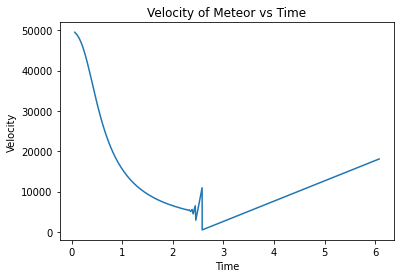

In [63]:
tlist,ylist,vlist = theory_of_meteor_constantb(50000,150000,1.73*(10**-9),1*(10**-9),10000)
plt.plot(tlist[0:len(vlist)],vlist)
plt.title("Velocity of Meteor vs Time")
plt.xlabel("Time")
plt.ylabel("Velocity")
print(ylist)

In [50]:
#theoretical position with respect to time
def position_of_meteor(y_initial,v_initial,b):
    tlist = []
    ylist = []
    t = 0
    while t < 15:
        dt = 0.01
        t = t + dt
        tlist.append(t)
        y = -((1/b)*math.log((1/v_initial)+(b*t))) + (1/b)*math.log(1/v_initial) + y_initial
        ylist.append(y)
    return(tlist,ylist)

Text(0.5, 1.0, 'Theoretical Position of Meteor vs Time with Constant B')

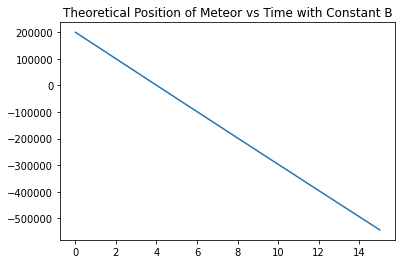

In [51]:
tlist,ylist=position_of_meteor(200000,50000,2.5*(10**-8))
plt.plot(tlist,ylist[0:len(tlist)])
plt.title("Theoretical Position of Meteor vs Time with Constant B")

Text(0, 0.5, 'Velocity in meters/second')

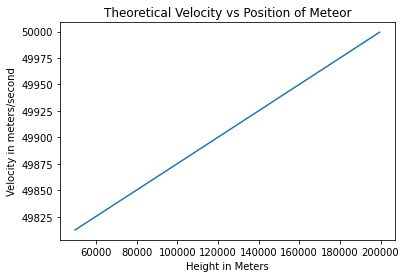

In [9]:
plt.plot(ylist,vlist)
plt.title("Theoretical Velocity vs Position of Meteor")
plt.xlabel("Height in Meters")
plt.ylabel("Velocity in meters/second")

In [38]:
def velocity_and_position_of_meteor(v_initial,y_initial,pair,m,H):
    '''simulation of meteor with constant b
    sign convention of negative b, so using negative velocity, acceleration must be positive '''
    time_list = []
    velocity_list = []
#sign of b must be positive to make dv negative, so its slowing down
    v = v_initial
    y = y_initial
    position_list = []
    t0 = 0
    t = t0
    while t < 8:
        b = ((1.21*pair)/(m**(1.3)*100))*(math.e**(-y/H))
        dt= 0.01/(b*v)
        t = t + dt
        time_list.append(t)
        dv= -b * v**2 * dt
        v = v + dv
        dy = -v * dt
        y = y + dy
        velocity_list.append(v)
        position_list.append(y)
        if y < 0:
            break
    return [time_list,velocity_list,position_list]

Text(0, 0.5, 'Height of Meteor')

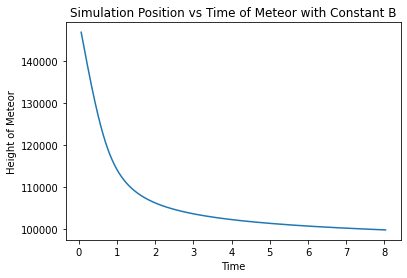

In [39]:
time_list,velocity_list,position_list=velocity_and_position_of_meteor(50000,150000,1.73*(10**-9),1*(10**-9),10000)
plt.plot(time_list,position_list)
plt.title("Simulation Position vs Time of Meteor with Constant B")
plt.xlabel("Time")
plt.ylabel("Height of Meteor")

Text(0, 0.5, 'Velocity')

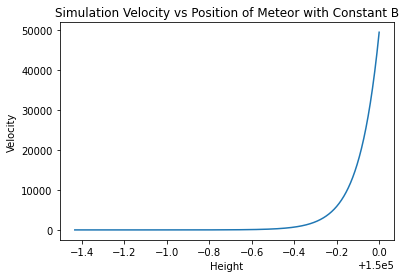

In [37]:
plt.plot(position_list,velocity_list)
plt.title("Simulation Velocity vs Position of Meteor with Constant B")
plt.xlabel("Height")
plt.ylabel("Velocity")

Text(0, 0.5, 'Velocity')

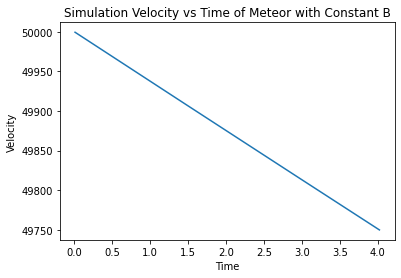

In [23]:
plt.plot(time_list[0:len(velocity_list)],velocity_list)
plt.title("Simulation Velocity vs Time of Meteor with Constant B")
plt.xlabel("Time")
plt.ylabel("Velocity")

ValueError: x and y must have same first dimension, but have shapes (801,) and (402,)

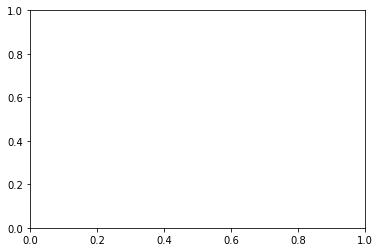

In [24]:
#plotting theoretical velocity vs time and simulation velocity vs time to compare
tlist,vlist = velocity_of_meteor(500000,2.5*(10**-8))
time_list,velocity_list,position_list=velocity_and_position_of_meteor(50000,200000,2.5*(10**-8))
plt.plot(tlist,velocity_list[0:len(tlist)])
plt.plot(time_list[0:len(tlist)],velocity_list[0:len(tlist)])
plt.title("Velocity vs Time Constant B of Simulation and Analytical")